Intall and import Tensorflow

In [1]:
#%tensorflow_version 2.x
#!pip uninstall -y tensorflow
!pip install --upgrade tensorflow
#!pip install tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


Import MNIST dataset

In [2]:
from tensorflow.keras import datasets

(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


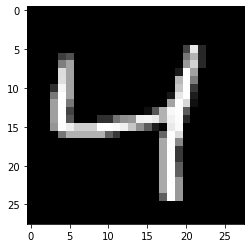

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[2],cmap='gray')

Check the dimensions of the training and test sets



In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Reshape the set to satisfy the requirements of CNNs.

In [5]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Create the model

In [0]:
from tensorflow.keras import models,layers

model=models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Compile and train the model

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2291 - accuracy: 0.9449
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0643 - accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0510 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0360 - accuracy: 0.9892


Calculate accuracy for the test set

In [10]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0426 - accuracy: 0.9880


0.9879999756813049

Predictions for a few test set images

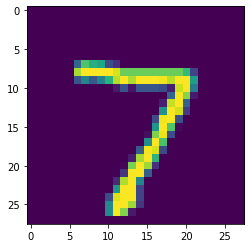

7


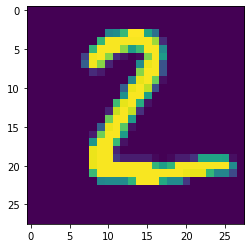

2


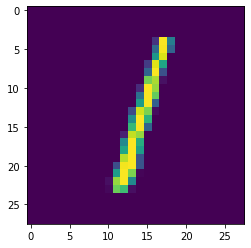

1


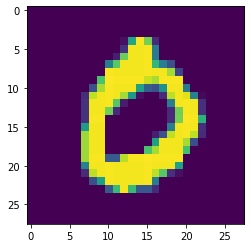

0


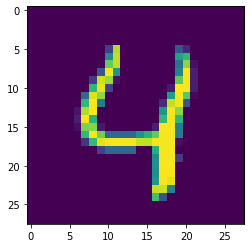

4


In [42]:
import time

for i in range(5):
  plt.imshow(test_images[i].reshape(28,28))
  plt.show()
  y_test=model.predict(test_images[i].reshape(1,28,28,1))
  y_test=max(y_test.tolist())
  print(y_test.index(max(y_test)))
  time.sleep(1.5)
